In [1]:
%matplotlib inline

import numpy as np # grey images are stored in memory as 2D arrays, color images as 3D arrays
import cv2 as cv2 # opencv computer vision library
from skimage import io # for io.imread
from matplotlib import pyplot as plt # ploting
from matplotlib import colors # ploting

# interactive notebook widgets
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from skimage import transform
from numpy import linalg
from numpy.linalg import inv

In [2]:

def imshow(images, titles, nrows = 0, ncols=0, figsize = (15,20)):

    if ncols == 0 and nrows == 0:
      ncols = len(images)
      nrows = 1
    if ncols == 0:
      ncols = len(images) // nrows
    if nrows == 0:
      nrows = len(images) // ncols
      
    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows, squeeze=False, figsize = figsize)
    for i, image in enumerate(images):
        axeslist.ravel()[i].imshow(image, cmap=plt.gray(), vmin=0, vmax=255)
        axeslist.ravel()[i].set_title(titles[i])
        axeslist.ravel()[i].set_axis_off()
    plt.tight_layout() # optional

In [3]:
urlA  = 'A.jpg'
urlB  = 'B.jpg'
urlC  = 'C.jpg'
urlD  = 'D.jpg'
urlE  = 'E.jpg'
urlF  = 'F.jpg'
urlG  = 'G.jpg'
urlH  = 'H.jpg'
urlI  = 'I.jpg'
urlK  = 'K.jpg'
urlL  = 'L.jpg'
urlM  = 'M.jpg'
urlN  = 'N.jpg'
urlO  = 'O.jpg'
urlP  = 'P.jpg'
urlQ  = 'Q.jpg'
urlR  = 'R.jpg'
urlS  = 'S.jpg'
urlT  = 'T.jpg'
urlU  = 'U.jpg'
urlV  = 'V.jpg'
urlW  = 'W.jpg'
urlX  = 'X.jpg'
urlY  = 'Y.jpg'
#24 lettres on enleve le j et le Z car ce sont des mouvements

imgA = io.imread(urlA)
imgB = io.imread(urlB)
imgC = io.imread(urlC)
imgD = io.imread(urlD)
imgE = io.imread(urlE)
imgF = io.imread(urlF)
imgG = io.imread(urlG)
imgH = io.imread(urlH)
imgI = io.imread(urlI)
imgK = io.imread(urlK)
imgL = io.imread(urlL)
imgM = io.imread(urlM)
imgN = io.imread(urlN)
imgO = io.imread(urlO)
imgP = io.imread(urlP)
imgQ = io.imread(urlQ)
imgR = io.imread(urlR)
imgS = io.imread(urlS)
imgT = io.imread(urlT)
imgU = io.imread(urlU)
imgV = io.imread(urlV)
imgW = io.imread(urlW)
imgX = io.imread(urlX)
imgY = io.imread(urlY)

urlTEST  = 'Test_L.jpg'
imgTEST = io.imread(urlTEST)

imgtest1 = io.imread('test1.jpg')
imgtest2 = io.imread('test2.jpg')

In [4]:
def extract_key_points(img1, img2): #using AKAZE opencv feature extractor and descriptor to detect and compute features on 2 images
    akaze = cv2.AKAZE_create()
    
    kp1, des1 = akaze.detectAndCompute(img1, None)
    kp2, des2 = akaze.detectAndCompute(img2, None)
    
    return kp1, des1, kp2, des2

def match_key_points(kp1, des1, kp2, des2):  #  match the features between images. The quality of each match is measured in the distance property of the match
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1,des2)
    return sorted(matches, key = lambda x:x.distance) #sort the matches by increasing distance so that the first matches of the list are the more relevant. 

def showMatches(img1, kp1, img2, kp2, matches, name):
    img = cv2.drawMatches(img1,kp1,img2,kp2,matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    imshow([img],[name])
    
def findHomography(matches, keypoint1, keypoint2): # find homography that transform img2 in img1 
    src_pts = np.array([keypoint1[match.queryIdx].pt for match in matches])
    dst_pts = np.array([keypoint2[match.trainIdx].pt for match in matches])
    H, mask = cv2.findHomography(src_pts, dst_pts,cv2.RANSAC)
    inliers = [ matches[m] for m in range(len(matches)) if mask[m]==1]
    return H, inliers

H= [[-2.99178645e-01 -2.01621770e-01  5.68444990e+02]
 [-1.65077385e-01  1.19681907e+00  7.34229766e+01]
 [-1.70731318e-03  3.20429931e-04  1.00000000e+00]]
de norme  573.1694602354572
H= [[ 1.06927489e+00  2.78298806e-01 -1.07187694e+02]
 [-2.01032078e-01  9.85286218e-01  2.15513867e+02]
 [ 3.65926545e-05  1.69090628e-04  1.00000000e+00]]
de norme  240.70450850521294


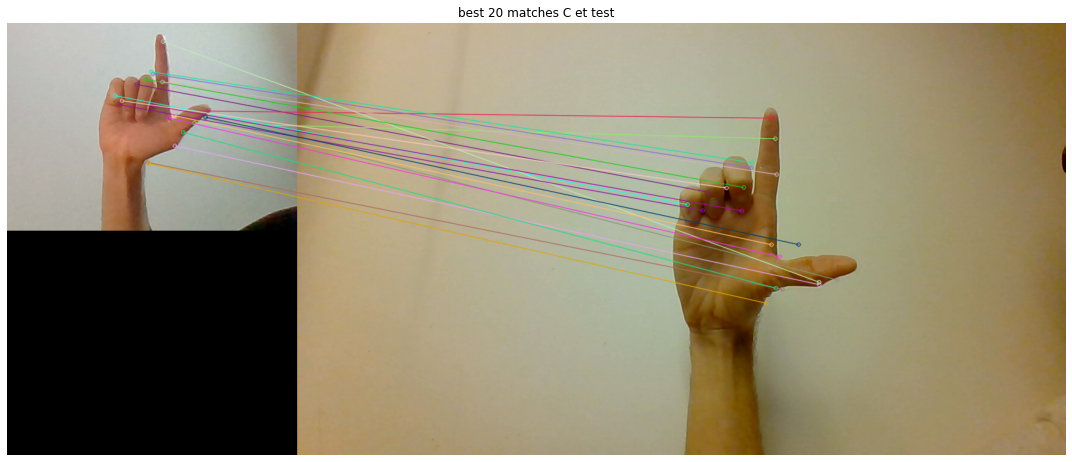

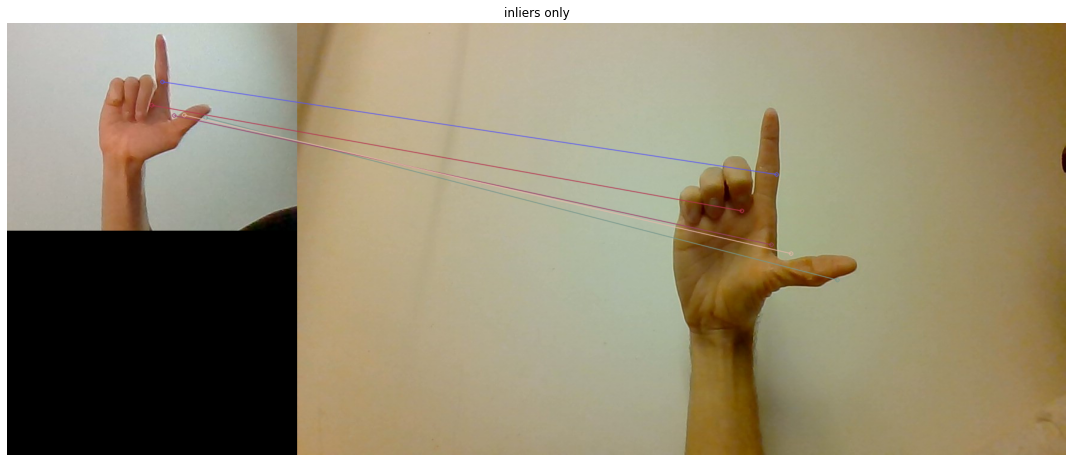

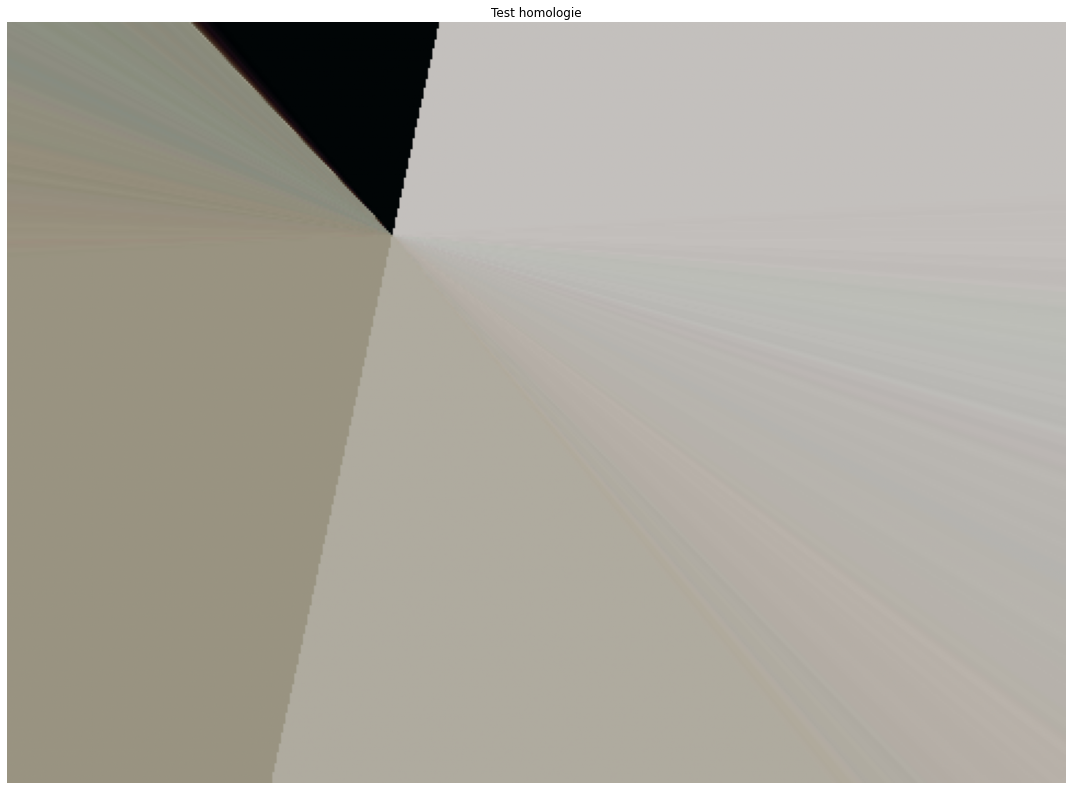

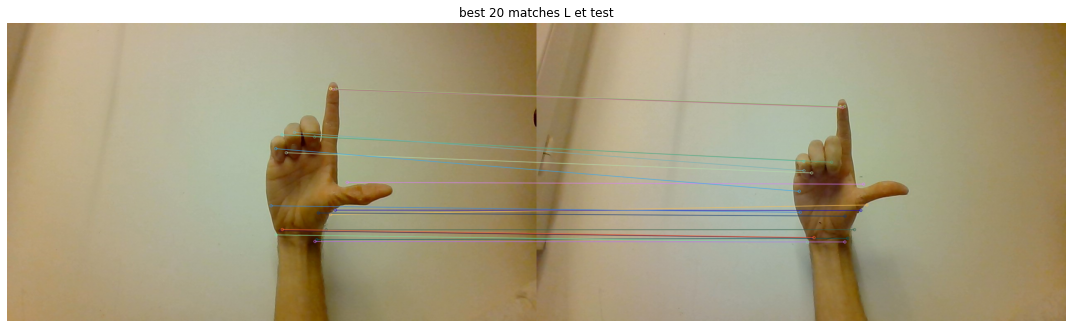

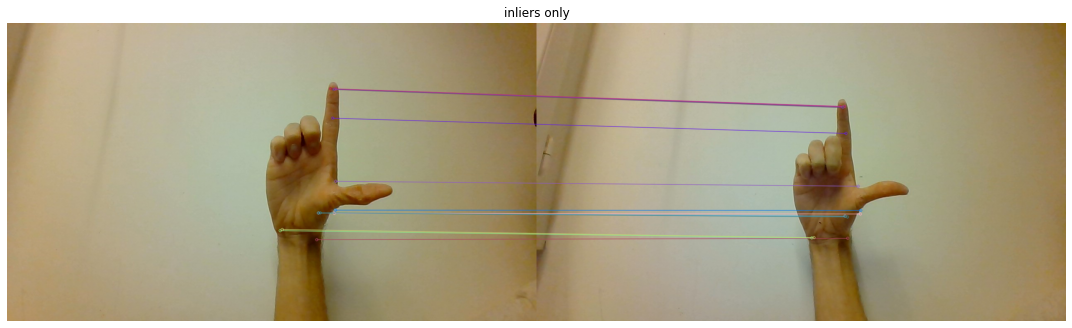

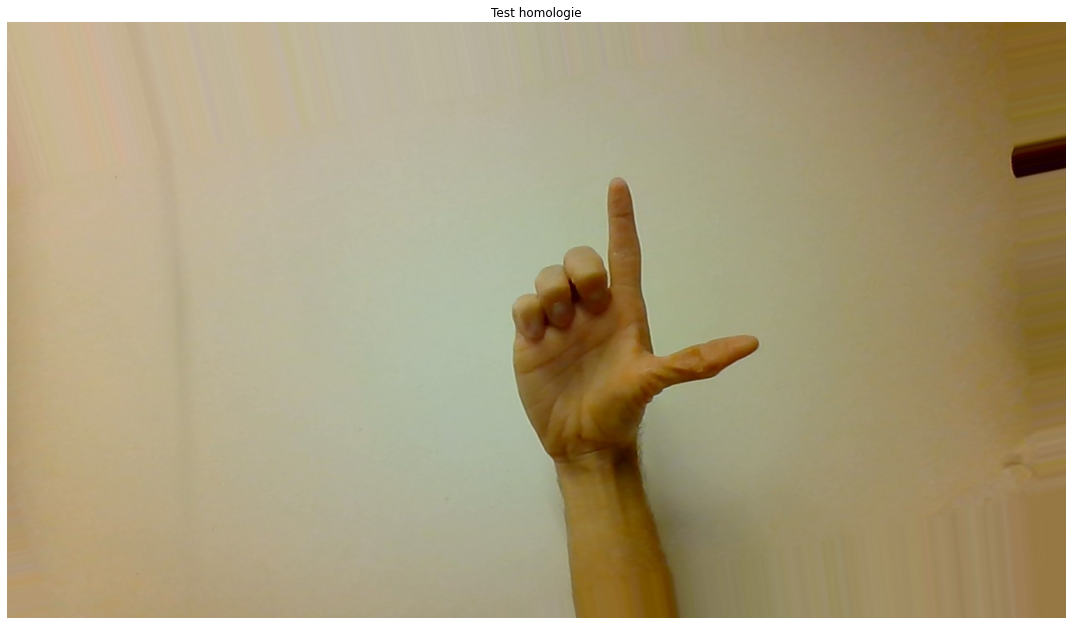

In [5]:
img1 =imgtest2
img2 =imgL
kp1, des1, kp2, des2 = extract_key_points(img1, img2)
matches = match_key_points(kp1, des1, kp2, des2)
showMatches(img1,kp1,img2,kp2,matches[:20],"best 20 matches C et test")
H, inliers = findHomography(matches, kp1, kp2)
showMatches(img1,kp1,img2,kp2,inliers,"inliers only")
img = transform.warp(img1, inv(H), mode = 'edge')
imshow([img],["Test homologie"])
print("H=",H)
print("de norme ", np.linalg.norm(H))

img1 =imgL
img2 =imgTEST
kp1, des1, kp2, des2 = extract_key_points(img1, img2)
matches = match_key_points(kp1, des1, kp2, des2)
showMatches(img1,kp1,img2,kp2,matches[:20],"best 20 matches L et test")
H, inliers = findHomography(matches, kp1, kp2)
showMatches(img1,kp1,img2,kp2,inliers,"inliers only")
img = transform.warp(img1, inv(H), mode = 'edge')
imshow([img],["Test homologie"])
print("H=",H)
print("de norme ", np.linalg.norm(H))